<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-setup" data-toc-modified-id="Project-setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project setup</a></span><ul class="toc-item"><li><span><a href="#Module-installation" data-toc-modified-id="Module-installation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Module installation</a></span></li><li><span><a href="#Folder-path-definitions-and-imports" data-toc-modified-id="Folder-path-definitions-and-imports-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Folder path definitions and imports</a></span></li></ul></li><li><span><a href="#Image-processing-and-vision" data-toc-modified-id="Image-processing-and-vision-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Image processing and vision</a></span><ul class="toc-item"><li><span><a href="#Image-acquisition" data-toc-modified-id="Image-acquisition-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Image acquisition</a></span></li><li><span><a href="#ArUco-markers" data-toc-modified-id="ArUco-markers-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ArUco markers</a></span></li><li><span><a href="#ArUco-markers-detection" data-toc-modified-id="ArUco-markers-detection-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>ArUco markers detection</a></span></li><li><span><a href="#Map-creation" data-toc-modified-id="Map-creation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Map creation</a></span><ul class="toc-item"><li><span><a href="#Detect-and-label-map-corners" data-toc-modified-id="Detect-and-label-map-corners-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Detect and label map corners</a></span></li><li><span><a href="#Calculate-transformation-matrix-from-corners-and-get-rectified-image" data-toc-modified-id="Calculate-transformation-matrix-from-corners-and-get-rectified-image-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Calculate transformation matrix from corners and get rectified image</a></span></li><li><span><a href="#Apply-filters-to-rectified-image" data-toc-modified-id="Apply-filters-to-rectified-image-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Apply filters to rectified image</a></span></li><li><span><a href="#Convert-filtered-rectified-image-to-grid-map-and-enlarge-the-obstacles" data-toc-modified-id="Convert-filtered-rectified-image-to-grid-map-and-enlarge-the-obstacles-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Convert filtered rectified image to grid map and enlarge the obstacles</a></span></li></ul></li><li><span><a href="#Thymio-and-objective-pose-measurement" data-toc-modified-id="Thymio-and-objective-pose-measurement-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Thymio and objective pose measurement</a></span></li></ul></li><li><span><a href="#Global-path-creation" data-toc-modified-id="Global-path-creation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Global path creation</a></span></li><li><span><a href="#Connection-to-the-Thymio" data-toc-modified-id="Connection-to-the-Thymio-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Connection to the Thymio</a></span><ul class="toc-item"><li><span><a href="#Automatic-port-detection" data-toc-modified-id="Automatic-port-detection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Automatic port detection</a></span></li><li><span><a href="#Reading-some-values-from-the-Thymio" data-toc-modified-id="Reading-some-values-from-the-Thymio-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Reading some values from the Thymio</a></span></li></ul></li><li><span><a href="#Moving-the-Thymio" data-toc-modified-id="Moving-the-Thymio-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Moving the Thymio</a></span><ul class="toc-item"><li><span><a href="#Speed-coefficient-measurement" data-toc-modified-id="Speed-coefficient-measurement-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Speed coefficient measurement</a></span></li><li><span><a href="#Rotation-coefficient-measurement" data-toc-modified-id="Rotation-coefficient-measurement-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Rotation coefficient measurement</a></span></li></ul></li><li><span><a href="#Pose-estimation:-Kalman-filter" data-toc-modified-id="Pose-estimation:-Kalman-filter-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pose estimation: Kalman filter</a></span><ul class="toc-item"><li><span><a href="#Kalman-filter-model" data-toc-modified-id="Kalman-filter-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Kalman filter model</a></span></li><li><span><a href="#Covariance-matrices-measurement-(Q,-R)" data-toc-modified-id="Covariance-matrices-measurement-(Q,-R)-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Covariance matrices measurement (Q, R)</a></span></li></ul></li><li><span><a href="#Local-avoidance" data-toc-modified-id="Local-avoidance-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Local avoidance</a></span></li><li><span><a href="#Demonstration" data-toc-modified-id="Demonstration-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Demonstration</a></span><ul class="toc-item"><li><span><a href="#Global-path-following" data-toc-modified-id="Global-path-following-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Global path following</a></span></li><li><span><a href="#Transition-between-local-and-global-navigation" data-toc-modified-id="Transition-between-local-and-global-navigation-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Transition between local and global navigation</a></span></li><li><span><a href="#Obstructing-the-camera" data-toc-modified-id="Obstructing-the-camera-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Obstructing the camera</a></span></li><li><span><a href="#Thymio-and-obstacle-kidnapping-situations" data-toc-modified-id="Thymio-and-obstacle-kidnapping-situations-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Thymio and obstacle kidnapping situations</a></span></li></ul></li></ul></div>

# Project setup

## Module installation
Our project uses modules from the extended OpenCV library for python. It is then necessary to first uninstall the base library and install the extended one to avoid any conflict.

In [1]:
!pip uninstall opencv-python

In [2]:
!pip install --user opencv-contrib-python
!pip install rdp

Defaulting to user installation because normal site-packages is not writeable


In [3]:
## Optional, add package path to sys
import sys
sys.path.append('c:\python310\lib\site-packages')

## Folder path definitions and imports

In [4]:
# ========================================================================== #
#  Imports.                                                                  # 
# ========================================================================== #

import os
import sys
import time
import matplotlib.pyplot as plt

# ========================================================================== #
#  Folder paths.                                                             # 
# ========================================================================== #

sys.path.insert(1, 'src')
sys.path.insert(1, 'img')

# Image processing and vision

## Image acquisition
We use for this project a high perfomance webcam (Logitech Brio), which ensures no error when starting the camera feed and good image quality. The following section is used to save pictures to the **img/cam** folder, pictures which will be used in the following sections as test images.

In [5]:
from camera import *
TAKE_PICTURE = False

In [6]:
if TAKE_PICTURE:
    # Get video capture instance. Default image size is 800 x 600.
    cam = init_camera()

    ## First take a picture in normal lighting conditions
    img_taken = False
    while not img_taken:
        img_normal, img_taken = take_picture(cam)
    save_camera_img(img_normal, "img_normal")
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    cam.release()

In [7]:
if TAKE_PICTURE:
    cam = init_camera()
    ## Then take it in low lighting conditions
    img_taken = False
    while not img_taken:
        img_low, img_taken = take_picture(cam)
    save_camera_img(img_low, "img_low")
    plt.imshow(cv2.cvtColor(img_low, cv2.COLOR_BGR2RGB))
    cam.release()

## ArUco markers
We will use ArUco markers in this project to detect map corners, as well as the Thymio and objective positions. ArUco markers come in different sizes (4x4 up to 7x7 using aruco module from cv2). For this project, we will use the **DICT_4X4_50** dictionary, which is a set of 50 different markers, of size 4x4 (or 6x6 if edges are accounted for).

In this project, we will use 6 different ArUco markers: 4 for detecting the corners of the map, 1 for locating the Thymio and finally 1 for detecting the position of the global objective.

The first step is to assign a unique ArUco marker ID (corresponding to a certain entry in the **DICT_4X4_50** dictionary) to each of the features that we want to detect. We arbitrarily choose the following IDs for each feature:
- Map IDs = [1, 2, 3, 4]
- Thymio ID = 5
- Objective ID = 6

The markers can then be generated using our custom function **generate_aruco_markers**.

In [8]:
from cv2 import aruco
from generate_aruco_markers import *

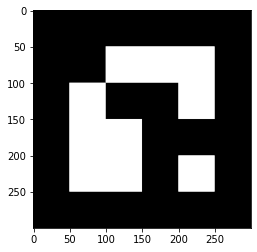

In [9]:
MAP_CORNER_ID = [1, 2, 3, 4]
THYMIO_ID = 5
OBJECTIVE_ID = 6

# Example of an ArUco marker generated using Thymio's marker ID.
marker = generate_aruco_marker(THYMIO_ID)
plt.imshow(marker, cmap = 'Greys_r')

## ArUco markers detection
Once printed, ArUco markers can then be detected. The following code, taken from https://www.pyimagesearch.com/2020/12/21/detecting-aruco-markers-with-opencv-and-python/, serves as an example of tag detection.

In [10]:
# This function displays detected aruco markers in an image. Labels (IDs) are also shown on top of the marker.
def display_aruco_markers(img):
    aruco_dict = arucoDict = cv2.aruco.Dictionary_get(DEF_ARUCO_DICT)
    aruco_params = cv2.aruco.DetectorParameters_create()
    if img_taken:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # cv2.imshow('raw image', img)
        # cv2.waitKey(1)
        (corners, ids, rejected) = cv2.aruco.detectMarkers(img, aruco_dict, parameters=aruco_params)
        # verify *at least* one ArUco marker was detected
        if len(corners) > 3:
            # flatten the ArUco IDs list
            ids = ids.flatten()
            # loop over the detected ArUCo corners
            for (markerCorner, markerID) in zip(corners, ids):
                # extract the marker corners (which are always returned in
                # top-left, top-right, bottom-right, and bottom-left order)
                corners = markerCorner.reshape((4, 2))
                (topLeft, topRight, bottomRight, bottomLeft) = corners
                # convert each of the (x, y)-coordinate pairs to integers
                topRight = (int(topRight[0]), int(topRight[1]))
                bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
                bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
                topLeft = (int(topLeft[0]), int(topLeft[1]))
                # draw the bounding box of the ArUCo detection
                cv2.line(img, topLeft, topRight, (0, 255, 0), 2)
                cv2.line(img, topRight, bottomRight, (0, 255, 0), 2)
                cv2.line(img, bottomRight, bottomLeft, (0, 255, 0), 2)
                cv2.line(img, bottomLeft, topLeft, (0, 255, 0), 2)
                # compute and draw the center (x, y)-coordinates of the ArUco
                # marker
                cX = int((topLeft[0] + bottomRight[0]) / 2.0)
                cY = int((topLeft[1] + bottomRight[1]) / 2.0)
                cv2.circle(img, (cX, cY), 4, (0, 0, 255), -1)
                # draw the ArUco marker ID on the image
                cv2.putText(img, str(markerID),
                    (topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 2)
                print("[INFO] ArUco marker ID: {}".format(markerID))
                # show the output image
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:
            print("ArUco markers not found")

[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


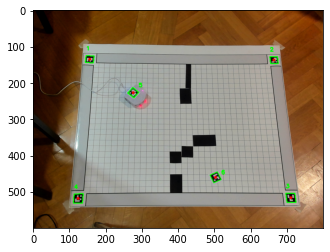

In [11]:
# In normal lighting conditions
img = cv2.imread(dirname + "img_normal.png")
display_aruco_markers(img)

[INFO] ArUco marker ID: 4
[INFO] ArUco marker ID: 3
[INFO] ArUco marker ID: 6
[INFO] ArUco marker ID: 5
[INFO] ArUco marker ID: 2
[INFO] ArUco marker ID: 1


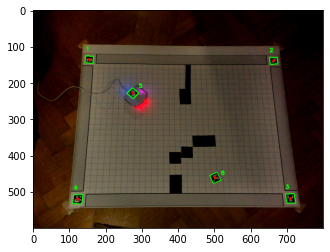

In [12]:
# In low lighting conditions
img = cv2.imread(dirname + "img_low.png")
display_aruco_markers(img)

We can indeed see that marker detection is extremely robust. In more tests that won't be shown here, we've observed that it can detect markers up to an inclination of around 70 degrees, which means that the camera doesn't have to be straight on top of the map.

## Map creation
The map creation process is defined as follow:
1. Detect and label map corners (top left, top right, bottom left, bottom right) from ArUco tags localisation.
2. Calculate transformation matrix from corners and get rectified image.
3. Apply various filters to rectified image (binarisation, gaussian blur, noise suppression, ArUco tags obstruction).
4. Convert rectified image to grid, detect obstacles.
5. Dilate map to get enlarged obstacles (to avoid collision with the Thymio).

The functions called in the next subsections will refer to the **create_map.py** module.


In [13]:
from create_map import *

### Detect and label map corners

Map corners found.


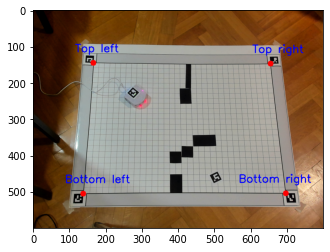

In [14]:
img = cv2.imread(dirname + "img_normal.png")
top_left, top_right, bot_left, bot_right, found_corners = get_map_corners(img)
if found_corners:
    print("Map corners found.")
    cv2.circle(img, [int(top_left[0]),int(top_left[1])] , 8, (0, 0, 255), -1)
    cv2.putText(img, "Top left", (top_left[0] - 50, top_left[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(top_right[0]),int(top_right[1])] , 8, (0, 0, 255), -1)
    cv2.putText(img, "Top right", (top_right[0] - 50, top_right[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(bot_left[0]),int(bot_left[1])] , 8, (0, 0, 255), -1)
    cv2.putText(img, "Bottom left", (bot_left[0] - 50, bot_left[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    
    cv2.circle(img, [int(bot_right[0]),int(bot_right[1])] , 8, (0, 0, 255), -1)
    cv2.putText(img, "Bottom right", (bot_right[0] -  130, bot_right[1] - 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
else:
    print("Map corners were not found.")
    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### Calculate transformation matrix from corners and get rectified image
The warp transform matrix is calculated knowing the map dimension in cells (so we can have the correct ratio between width and height).

Image dimensions are 800 x 600
Rectified image dimensions are 800 x 581


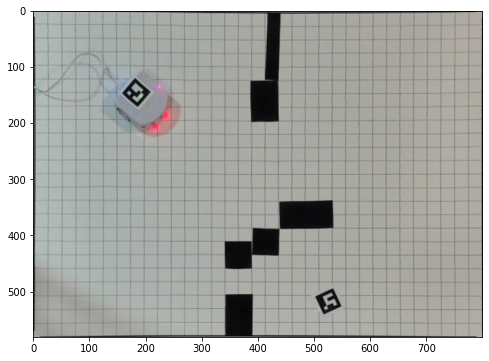

In [15]:
img = cv2.imread(dirname + "img_normal.png")
map_width = MAP_WIDTH_CELL # 33
map_height = MAP_HEIGHT_CELL # 24
M, rect_width, rect_height, matrix_computed = get_warp_matrix(img, map_width, map_height, verbose = True)

plt.rcParams['figure.figsize'] = [8.25, 6]
# Rectified image dimensions have the same ratio as given parameters (33/24) 
# and resolution is bounded by original image dimensions.
img_rect = get_rectified_img(img, M, rect_width, rect_height)
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))

### Apply filters to rectified image

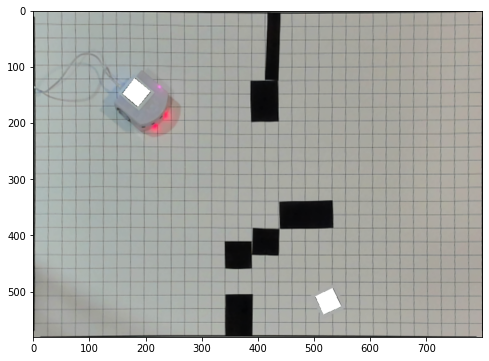

In [16]:
# Remove aruco tags from image. This is done to avoid having them considered as obstacles.
img_rect = remove_aruco_tags(img_rect)
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))

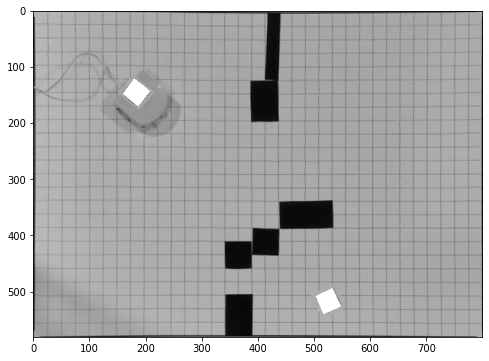

In [17]:
 # Convert to grayscale
img_rect_gray = cv2.cvtColor(img_rect, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_rect_gray, cv2.COLOR_BGR2RGB))

Text(0.5, 1.0, 'Filtered and thresholded rectified image')

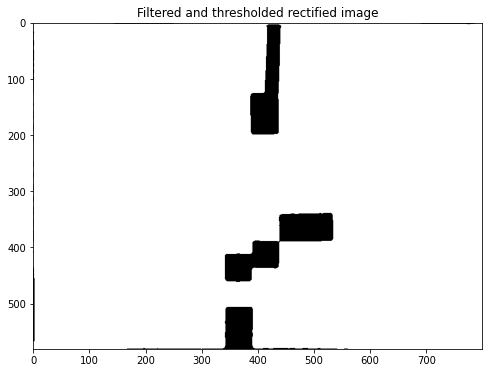

In [18]:
# Convert to binary image
# Blur to reduce noise
img_rect_gray = cv2.GaussianBlur(img_rect_gray,(9,9),cv2.BORDER_DEFAULT)
# Otsu's method is used for dynamic thresholding
(thresh, img_rect_bin) = cv2.threshold(img_rect_gray, BIN_THR_LOW, BIN_THR_HIGH, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_rect_bin = cv2.morphologyEx(img_rect_bin, cv2.MORPH_OPEN, (4,4))
plt.imshow(img_rect_bin, cmap = 'Greys_r')
plt.title("Filtered and thresholded rectified image")

### Convert filtered rectified image to grid map and enlarge the obstacles
Details about the implementation will not be discussed here. Please refer to the **create_map** function in the file **create_map.py**.

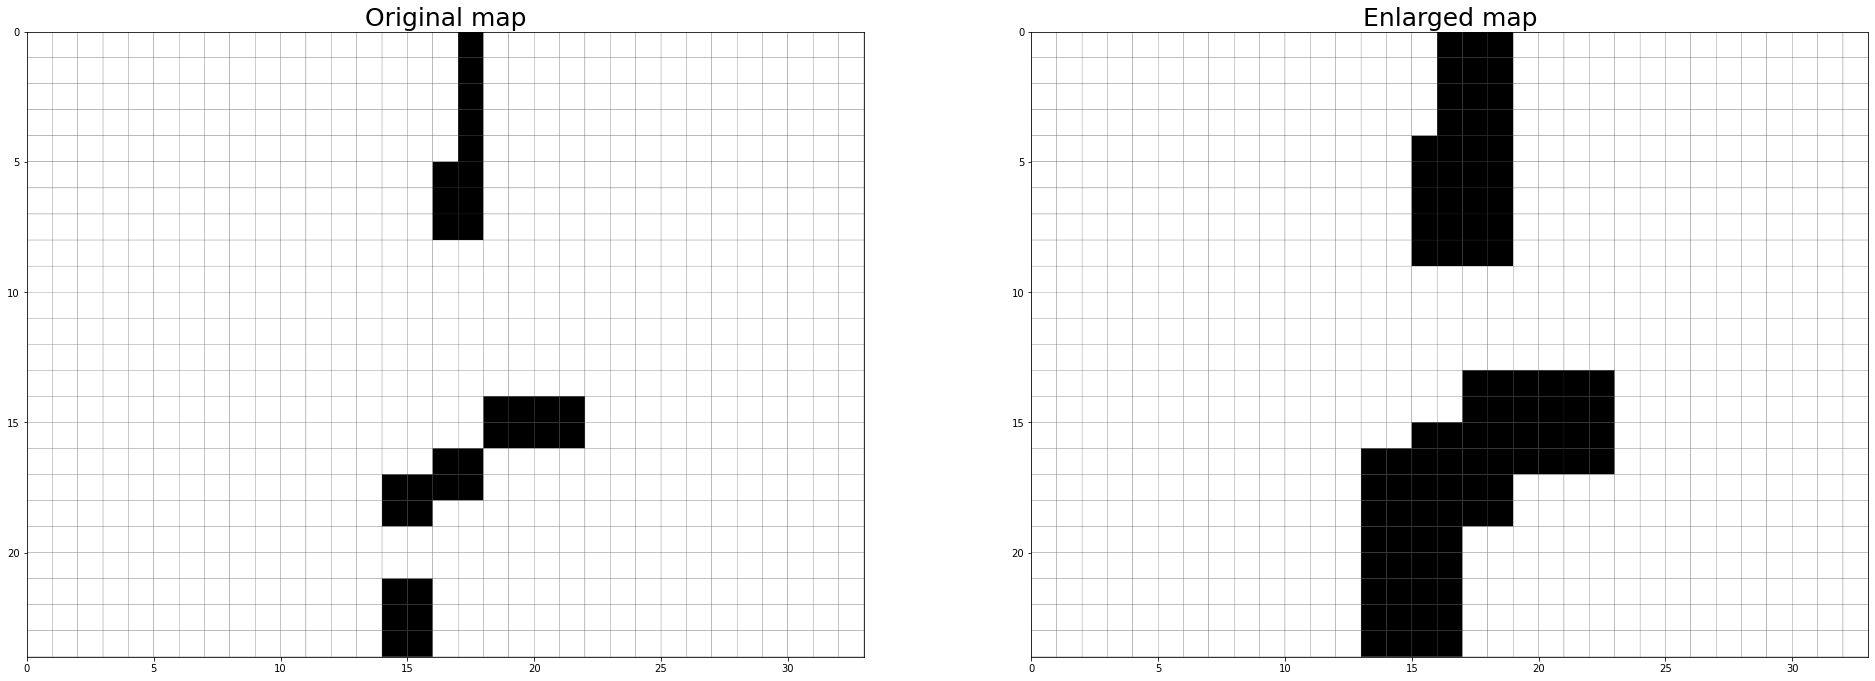

<Figure size 594x432 with 0 Axes>

In [19]:
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)

f, axs = plt.subplots(1,2)
f.set_figheight(11.5)
f.set_figwidth(33)
plt.figure()

axs[0].pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
axs[0].set_title("Original map", fontsize=25)
axs[0].invert_yaxis()

axs[1].pcolor(map_enlarged, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
axs[1].set_title("Enlarged map", fontsize=25)
axs[1].invert_yaxis()


## Thymio and objective pose measurement
Thymio and objective localisation with the camera is pretty straightforward. As was done with the map, we detect their corresponding ArUco marker. In the case of the Thymio, we also calculate its orientation.

In [20]:
from locate_thymio_goal import *

Text(0.5, 1.0, 'Rectified image')

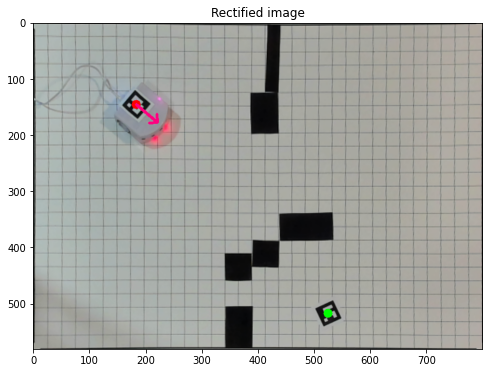

In [21]:
img = cv2.imread(dirname + "img_normal.png")
map_width = MAP_WIDTH_CELL # 33
map_height = MAP_HEIGHT_CELL # 24
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)
img_rect = get_rectified_img(img, M, rect_width, rect_height)

thymio_pose, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
if thymio_found:
    cv2.circle(img_rect, [int(thymio_pose[0]),int(thymio_pose[1])] , 8, (0, 0, 255), -1)
    cv2.arrowedLine(img_rect, (int(thymio_pose[0]), int(thymio_pose[1])), (int(thymio_pose[0] + 
                    math.cos(thymio_pose[2])*50), int(thymio_pose[1] - math.sin(thymio_pose[2])*50)),
                    (128, 0, 255), 3, tipLength = 0.3)
else:
    print("Thymio not found.")

obj_pose, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
if obj_found:
    cv2.circle(img_rect, [int(obj_pose[0]),int(obj_pose[1])] , 8, (0, 255, 0), -1)
else:
    print("Objective not found.")
plt.imshow(cv2.cvtColor(img_rect, cv2.COLOR_BGR2RGB))
plt.title("Rectified image")

# Global path creation

In [22]:
from global_path_planning import *

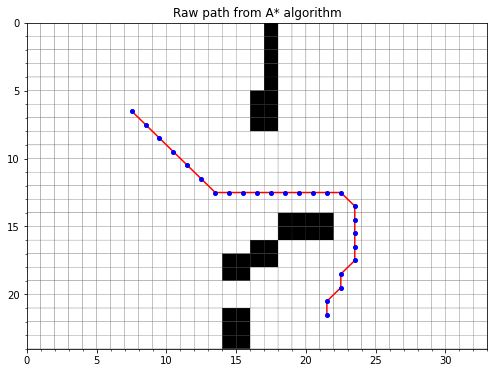

In [40]:
# Read test image
img = cv2.imread(dirname + "img_normal.png")

# Create map
M, rect_width, rect_height, map, map_enlarged, map_created = create_map(img, MAP_WIDTH_CELL, MAP_HEIGHT_CELL)
img_rect = get_rectified_img(img, M, rect_width, rect_height)

# Find Thymio and objective positions
thymio_pos, thymio_found = locate_thymio_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
obj_pos, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))

# Convert xy coordinates to grid coordinates
thymio_pos_grid = cartesian_to_grid(thymio_pos[0:2], (rect_width, rect_height), (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
obj_pos_grid = cartesian_to_grid(obj_pos, (rect_width, rect_height), (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))

# Compute path (list of cells)
path, found_path = get_global_path(map_enlarged, thymio_pos_grid, obj_pos_grid)

# Plot the path
plt.figure()
plt.plot([row[1]+1/2 for row in path], [col[0]+1/2 for col in path], "-o", color = "r", markersize = 4,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Raw path from A* algorithm")
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

plt.minorticks_on()

As there are too many turns, we want to simplify the path. This can be done by using the **Ramer-Douglas-Peucker** algorithm. We use the **rdp** library to implement this function.

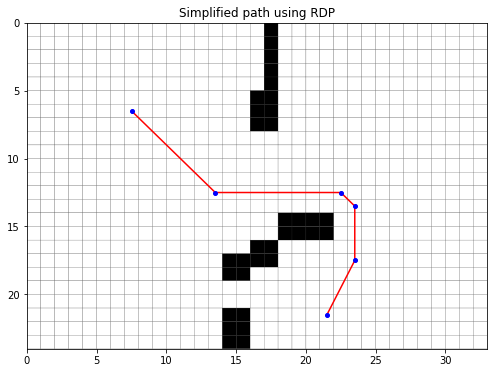

In [41]:
path_rdp = rdp(path, epsilon = 0.5)

# Plot the simplified path
plt.figure()
plt.plot([row[1]+1/2 for row in path_rdp], [col[0]+1/2 for col in path_rdp], "-o", color = "r", markersize = 4,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Simplified path using RDP")
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

Now that the path is simplified, we want to add back intermediate points. These are used as local objective when entering into the local avoidance state. Having more points also means that the Thymio will try to regulate its position to follow the path more frequently. The function **lin_refine_implicit** is used to implement this function, which is taken from the following website: https://coderedirect.com/questions/288098/higher-order-local-interpolation-of-implicit-curves-in-python. This function adds 2<sup>(n-1)</sup> points to each segment.

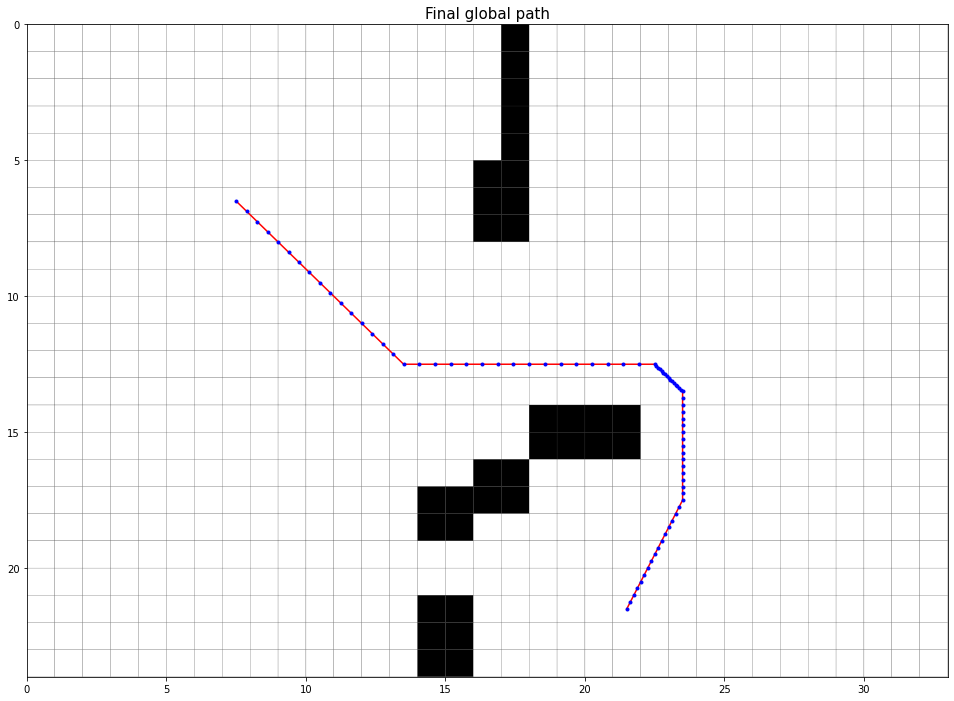

In [42]:
path_refined = lin_refine_implicit(path_rdp, n=5)

# Plot the simplified path with intermediate points (5 intermediate points per segment)
f = plt.figure()
f.set_figheight(12)
f.set_figwidth(16.5)
plt.plot([row[1]+1/2 for row in path_refined], [col[0]+1/2 for col in path_refined], "-o", color = "r", markersize = 3,
         markerfacecolor = 'b', markeredgecolor = 'b')
plt.title("Final global path", fontsize = 15)
plt.pcolor(map, edgecolors=(0.2, 0.2, 0.2), linewidth=0.2, cmap = 'Greys')
plt.gca().invert_yaxis()

# Connection to the Thymio

In [26]:
from MyThymio import *
from thymio_connection import *

## Automatic port detection
To ensure that the program can be run on different computers and with different connection types (cable, wireless), we first identify the Thymio VID (Vendor ID) and put it in a list (in case of multiple Thymios, we can have multiple VIDs). When connecting, the program checks for the VID of each serial port, and initiates a communication if a matching VID is found. In practice, with multiple Thymios we have seen only one VID, which was 1559.

In [27]:
check_vid()

Port: COM16, VID: None
Port: COM8, VID: None
Port: COM11, VID: None
Port: COM22, VID: None
Port: COM14, VID: 1559
Port: COM13, VID: None
Port: COM10, VID: None
Port: COM12, VID: None
Port: COM21, VID: None


It is then possible to connect to the Thymio by creating a MyThymio object.

In [30]:
thymio = MyThymio(verbose = True)

Connecting to Thymio. Try 1/inf...
Successfully connected to thymio on COM14.


## Reading some values from the Thymio
Below is an example of reading the proximity sensor values and moving the Thymio. More details about Thymio movements will be discussed in the next section.

In [ ]:
# Reading proximity sensor values
prox = thymio.get_prox_horizontal()
print(prox)

# Example: Rotating the THymio, then moving the Thymio forward for 5 second
thymio.set_motor_speeds(-50, 100)
time.sleep(5)
thymio.set_motor_speeds(100, 100)
time.sleep(5)
thymio.stop_thymio()

# Moving the Thymio

## Speed coefficient measurement

## Rotation coefficient measurement

# Pose estimation: Kalman filter

## Kalman filter model

## Covariance matrices measurement (Q, R)

# Local avoidance

In our current implementation, local navigation relies on camera measurements to be able to detect where the Thymio is in relation to its local objective. When the camera is obstructed, the Thymio stops its motors to prevent it from diverging. Moreover, the map obstacles (flat on the ground) are not counted as obstacles during this phase. Consequently, the Thymio can avoid obstacles but only the ones that it can see with its proximity sensors.

In [32]:
from local_navigation import *

For this demonstration, you will need to print or have a map, place the ArUco markers and place the ArUco markers at the right places (4 markers for the map corners, 1 for the Thymio and 1 for the objective). In the following demonstration, the Thymio tries to get to the objective using a potential field. The objective is an attractive node, and physical obstacles that are in its path are repulsive.

In [33]:
cam = init_camera()
M, rect_width, rect_height, map, map_enlarged = init_map(cam)
obj_pos = [0, 0]
obj_found = False
while not obj_found:
    img, img_taken = take_picture(cam)
    if img_taken:
        img_rect = get_rectified_img(img, M, rect_width, rect_height)
        obj_pos, obj_found = locate_goal_camera(img_rect, "cartesian", (MAP_WIDTH_CELL, MAP_HEIGHT_CELL))
local_avoidance(thymio, obj_pos, cam, M, rect_width, rect_height)

Obstacle avoided


# Demonstration

## Global path following

## Transition between local and global navigation

## Obstructing the camera

## Thymio and obstacle kidnapping situations